In [97]:
import pandas as pd
import numpy as np
import pylab
from IPython.display import Image, display
import matplotlib.pyplot as plt
import import_ipynb
from pandas import DataFrame, Series

# Vertical Ground Heat Exchanger (VGHE) Design
#### Determine the required length of a vertical ground heat exchanger for a $2,400 ft^2 * 8ft$ residential building in Lansing, MI.
##### Assume the following:
1) Design cooling load = $700 ft^2/ton$
2) Cooling design month = July
3) Design heating load = $3.0 Btu/hr-ft^3$
4) Heating design month = January
##### Ground conditions
1) Undisturbed ground temperature = $45°F$
2) Ground thermal conductivity = $1.15 Btu/hr-ft-°F$
3) Ground thermal diffusivity = $0.94 ft^2/day$
4) Grout thermal conductivity = $0.85 Btu/hr-ft-°F$
##### Borehole information
1) Diameter = $6”$
2) U-tube = HDPE: DR 11  (1” in Diameter)


### Determine the ground heat exchanger length


In [81]:
Area = 2400 # residential building area, [ft2]
CL = 700 # Design cooling load [ft^2/ton]
HL = 3.0 # Design heating load [Btu/hr-ft^3]

#### Step 1: Determine the building cooling and heating load


In [82]:
# Building design cooling block load (~4-6 hr block of time)
Q_lc = Area/CL * 12000
# Building design heating block load (~4-6 hr block of time) = $Q_{lh}$
Q_lh = Area * 8 * HL
print('Building design cooling block load =',f"{Q_lc:.2f}",'[Btu/hr]')
print('Building design heating block load =',f"{Q_lh:.2f}",'[Btu/hr]')

Building design cooling block load = 41142.86 [Btu/hr]
Building design heating block load = 57600.00 [Btu/hr]


#### Step 2: Select a geothermal heat pump

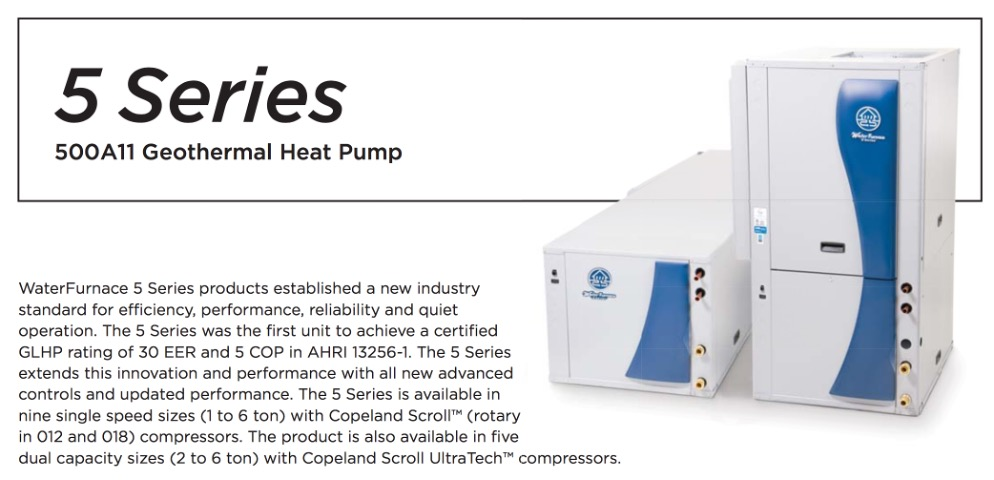

In [83]:
display(Image(filename='500A11GeoHP.jpg')) 

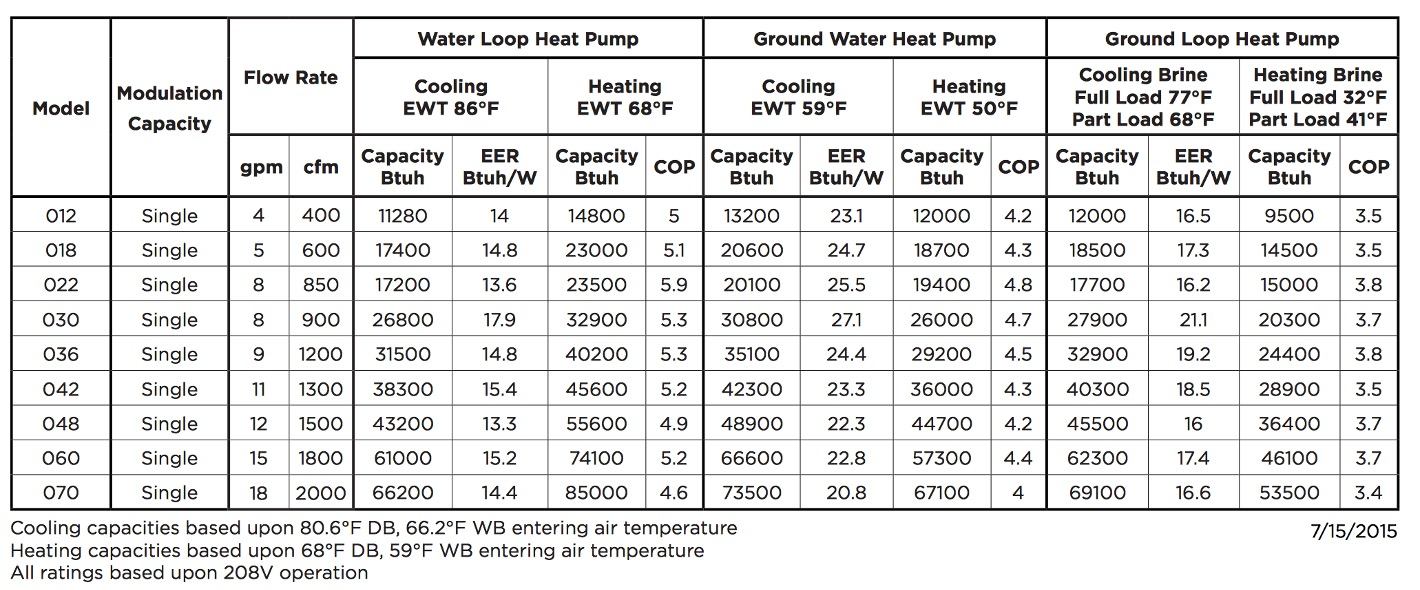

In [84]:
display(Image(filename='Geo_HP_information.jpg')) 

#### Summarize the information we need:

In [85]:
T_ewt_cool = 77 #[F]
print('Water inlet temperature in cooling mode =',f"{T_ewt_cool:.0f}",'[°F]')
T_ewt_heat = 32 #[F]
print('Water inlet temperature in heating mode =',f"{T_ewt_heat:.0f}",'[°F]')
m_dot_w = 12 #[gpm]
print('Water mass flow rate =',f"{m_dot_w:.0f}",'[gpm]')
Q_cap_cool = 45500 # [Btu/hr]
print('Cooling capacity =',f"{Q_cap_cool:.0f}",'[Btu/hr]')
Q_cap_heat = 36400 # [Btu/hr]
print('Heating capacity =',f"{Q_cap_heat:.0f}",'[Btu/hr]')
EER = 16 #[Btu/W-hr]
print('Cooling EER =',f"{EER:.0f}",'[Btu/W-hr]')
COP = 3.7
print('Heating COP =',f"{COP:.1f}",'[-]')

Water inlet temperature in cooling mode = 77 [°F]
Water inlet temperature in heating mode = 32 [°F]
Water mass flow rate = 12 [gpm]
Cooling capacity = 45500 [Btu/hr]
Heating capacity = 36400 [Btu/hr]
Cooling EER = 16 [Btu/W-hr]
Heating COP = 3.7 [-]


#### Step 3: Determine the temperature of outflowing water
1) In Ac mode:
$$Q_{bore,c} = Q_{cap,cool} + W_{cool}$$
$$EER = \frac{Q_{cap,cool}}{W_{cool}} \Rightarrow W_{cool} = \frac{Q_{cap,cool}}{EER}$$
so: $$Q_{bore,c} = Q_{cap,cool}\left(1+\frac{3.14}{EER}\right)$$

2) In HP mode: 
$$Q_{bore,h} = Q_{cap,heat} - W_{heat}$$
$$COP = \frac{Q_{cap,heat}}{W_{heat}} \Rightarrow W_{heat} = \frac{Q_{cap,heat}}{COP}$$
so: $$Q_{bore,h} = Q_{cap,heat}\left(1-\frac{1}{COP}\right)$$
The temperature of outflowing water:
1) In AC mode:
$$Q_{bore,c} =m_w*c_{p,w}*(T_{ewt}-T_{owt})$$
2) In HP mode:
$$Q_{bore,h} =m_w*c_{p,w}*(T_{owt}-T_{ewt})$$

Note: To convert gallons per minute (GPM) to pounds per hour (lb/h) for water, you can use the following formula:
$$Mass flow rate (lbm/hr) = Flow rate (GPM) * 8.34 \frac{lb}{gal} * 60 \frac {min}{hr}$$
​	
 

In [86]:
c_pw = 1 #[Btu/lb°F]
# Calculate cooling power:
W_cool = Q_cap_cool/EER  #[W]
# Calculate heat transfer in borehole in cooling:
Q_bore_cool = Q_cap_cool*(1+3.412/EER) #[Btu/hr]
# Calculate the water flowing out in AC mode:
T_owt_cool = T_ewt_cool + Q_bore_cool/(m_dot_w * 8.34 * 60 * c_pw)
# Calculate cooling power:
W_heat = Q_cap_heat/3.41/COP #[W]
# Calculate heating power: 
Q_bore_heat = Q_cap_heat*(1-1/COP)
# Calculate the water flowing out in HP mode:
T_owt_heat = T_ewt_heat - Q_bore_heat/(m_dot_w *8.34*60* c_pw)
print('Cooling power =',f"{W_cool:.0f}",'[W]')
print('Heating power =',f"{W_heat:.0f}",'[W]')
print('Heat transfer in borehole for cooling =',f"{Q_bore_cool:.0f}",'[Btu/hr]')
print('Heat transfer in borehole for heating =',f"{Q_bore_heat:.0f}",'[Btu/hr]')
print('Water outlet temperature in cooling mode =',f"{T_owt_cool:.1f}",'[°F]')
print('Water outlet temperature in heating mode =',f"{T_owt_heat:.1f}",'[°F]')

Cooling power = 2844 [W]
Heating power = 2885 [W]
Heat transfer in borehole for cooling = 55203 [Btu/hr]
Heat transfer in borehole for heating = 26562 [Btu/hr]
Water outlet temperature in cooling mode = 86.2 [°F]
Water outlet temperature in heating mode = 27.6 [°F]


#### Step 4: Determine Heating and Cooling Load Information

/var/folders/1y/tn10k2tn5s5bsc_g8p9s7d0h0000gn/T/ipykernel_70504/1594666304.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(loc='upper left')


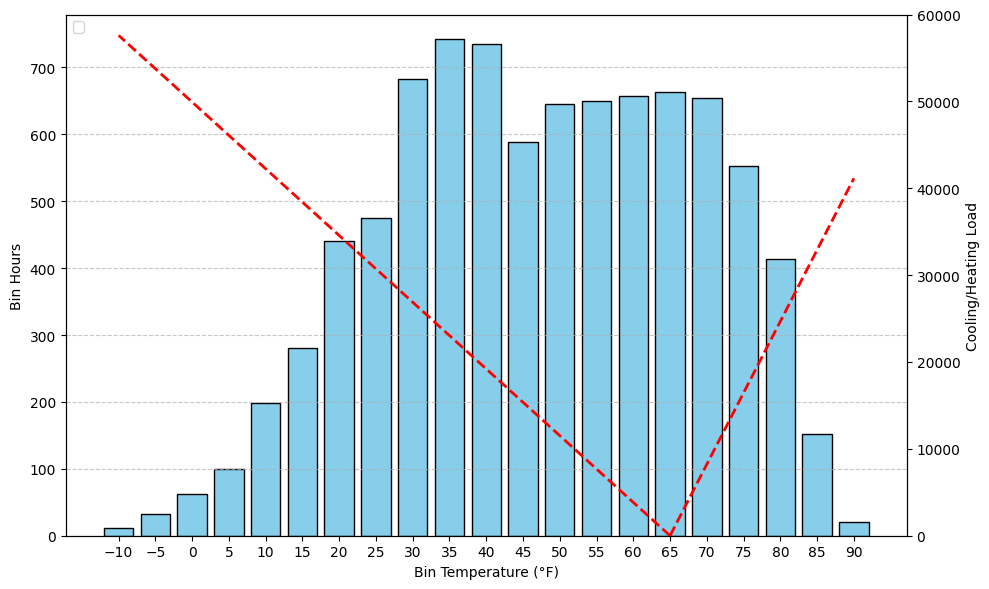

In [87]:
bin_temp = [-10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]
bin_hours = [12, 32, 63, 100, 199, 281, 441, 475, 683, 742, 735, 588, 645, 650, 658, 664, 655, 552, 413, 152, 20]

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart on primary y-axis
ax1.bar(bin_temp, bin_hours, width=4, edgecolor='black', color='skyblue')
ax1.set_xlabel('Bin Temperature (°F)')
ax1.set_ylabel('Bin Hours')
ax1.set_xticks(bin_temp)
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

# Create secondary y-axis
ax2 = ax1.twinx()
ax2.plot([65,90], [0,Q_lc], color='red', linestyle='--', linewidth=2)
ax2.plot([65,-10], [0,Q_lh], color='red', linestyle='--', linewidth=2)
ax2.set_ylabel('Cooling/Heating Load')
ax2.set_ylim(0, 60000)

# Optional: Add legend for the secondary line
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

##### Determine the cooling and heating load for different temperature:
$$BL_c(t_j) = \left(\frac{t_j-65}{90-65}\right)*BL_{c,design}$$
$$BL_h(t_j) = \left(\frac{65-t_j}{65-(-10)}\right)*BL_{h,design}$$

In [108]:
T_g = 45 #Undisturbed ground temperature, [°F]
# Average July cooling load:
CL_Jul = 21081 #[Btu/hr]
# Average January heating cooling load:
HL_Jan = 24620 #[Btu/hr]
# Net annual average heat transfer to ground
Q_annual = 6814 #[Btu/hr]
# Part load factor during design month-Jul
PLF_c = CL_Jul/(Q_lc*(1+3.412/EER))
# Part load factor during design month-Jan
PLF_h = HL_Jan/(Q_lh*(1-1/COP))
print('Part load factor during design month-Jul =',f"{PLF_c:.4f}")
print('Part load factor during design month-Jan =',f"{PLF_h:.4f}")
print('Net annual average heat transfer to ground =',f"{Q_annual:.0f}",'[Btu/hr]')

Part load factor during design month-Jul = 0.4223
Part load factor during design month-Jan = 0.5857
Net annual average heat transfer to ground = 6814 [Btu/hr]


#### Step 5: Determine Short-circuit Heat Loss Factor, Temperature Penalty Factor and Borehole thermal resistance


1) Short-circuiting heat transfer between the upward and downward flow legs of a U-bend loop can degrade the performance of borehole heat exchangers, especially when U-tubes are piped in parallel.
2) Ideally, heat should transfer between the fluid and the surrounding ground.However, some heat bypasses the ground by directly transferring between the two fluid legs via the pipe wall and grout — this is thermal short-circuiting.

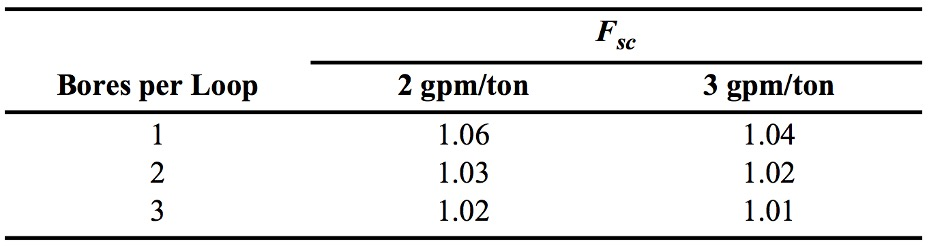

Short circuit heat loss factor (tables, typically < 1.04)= 1.04


In [89]:
display(Image(filename='Fsc.jpg')) 
F_sc = 1.04
print('Short circuit heat loss factor (tables, typically < 1.04)=',f"{F_sc:.2f}")

#### Penalty temperature
The penalty temperature is the difference between the actual entering water temperature (EWT) to the heat pump and the ideal or initial design EWT.
In a geothermal heat pump (GHP) system, the gradual change in ground loop temperature—caused by long-term heat buildup in cooling-dominated climates or heat depletion in heating-dominated climates—leads to reduced system performance or increased energy consumption over time.

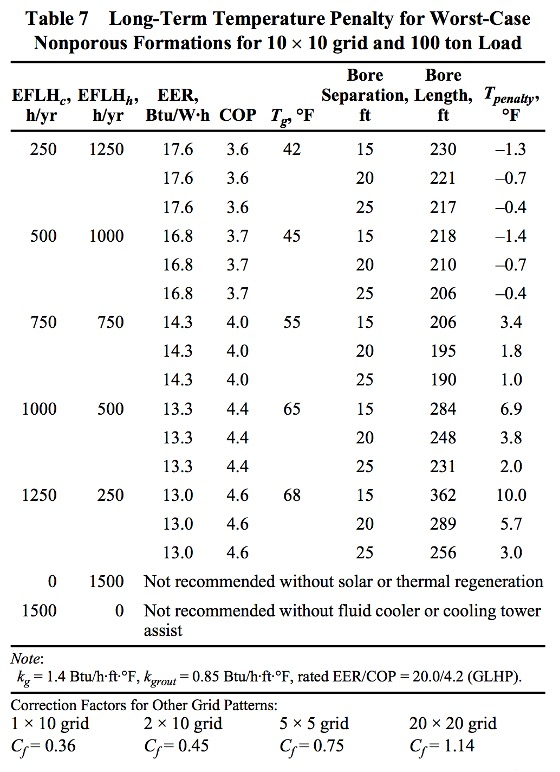

Temperature penalty for interference of adjacent bores (tables) = -0.252


In [90]:
display(Image(filename='TemperaturePenaltyFactor.jpg')) 
T_p = -0.7*0.36 # TemperaturePenaltyFact
print('Temperature penalty for interference of adjacent bores (tables) =',f"{T_p:.3f}")

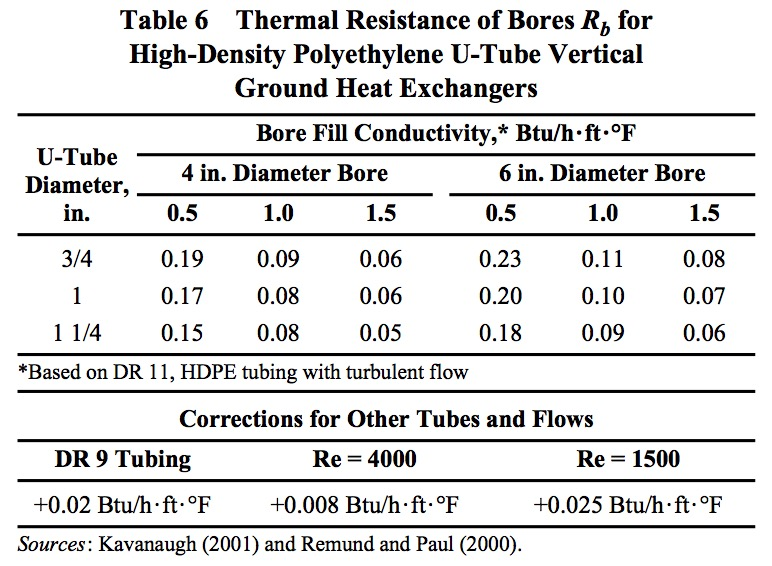

Thermal resistance of the bore = 0.13


In [105]:
display(Image(filename='Boreholethermalresistance.jpg'))
# Grout thermal conductivity 
k_grout = 0.85 #[Btu/hr-ft-°F$]
# Borehole thermal resistance
R_b = (k_grout-0.5)/(1.0-0.5)*(0.1-0.2)+0.2
print('Thermal resistance of the bore =',f"{R_b:.2f}")

#### Step 6: Determine Thermal Resistances
1) Define the time frames [days]:\
$\tau_1 = 365$ (10-years)\
$\tau_2 = 365 + 30 = 395$ (1-years + 1-month)\
$\tau_f = 365 + 30 + 0.25 = 395.25$ (1-years + 1-month + 6-hours)\
2) Determine the Fourier numbers:\
$\text{Fo}_f = 4 \alpha \tau_f/d^2$ (entire time frame)\
$\text{Fo}_1 = 4 \alpha (\tau_f-\tau_1)/d^2$  (1-month + 6-hours)\
$\text{Fo}_2 = 4 \alpha (\tau_f-\tau_2)/d^2$  (6-hours)

3) Determine the three G-factors using the chart

4) Determine the equivalent thermal resistances for each heat pulse:
$$R_{ga} = \frac{G_f-G_1}{k_{ground}}$$
$$R_{gm} = \frac{G_1-G_2}{k_{ground}}$$
$$R_{gd} = \frac{G_2}{k_{ground}}$$


In [102]:
# Ground thermal diffusivity 
alph = 0.94 #[ft^2/day]
# Borehole diameter
D_bore = 0.5 # 6 inch
# the time frames [days]
t_1 = 365 # one-year
t_2 = 365 + 30 # 1-years + 1-month
t_f = 365 + 30 + 0.25 # 1-years + 1-month + 6-hours
# the Fourier numbers
Fo_f = 4 * alph * t_f/(D_bore)**2 # one-year
Fo_1 = 4 * alph * (t_f - t_1) /(D_bore)**2 # 1-years + 1-month
Fo_2 = 4 * alph * (t_f - t_2) /(D_bore)**2 # 1-years + 1-month + 6-hours

G_f = 0.75
G_1 = 0.55
G_2 = 0.21

data = {
    "": ["Fourier numbers", "G-factors"],
    "Fo_f": [f"{Fo_f:.2f}",f"{G_f:.2f}"],
    "Fo_1": [f"{Fo_1:.2f}",f"{G_1:.2f}"],
    "Fo_2": [f"{Fo_2:.2f}", f"{G_2:.2f}"],
    
}
df = pd.DataFrame(data)
df

,,Fo_f,Fo_1,Fo_2
0,Fourier numbers,5944.56,454.96,3.76
1,G-factors,0.75,0.55,0.21


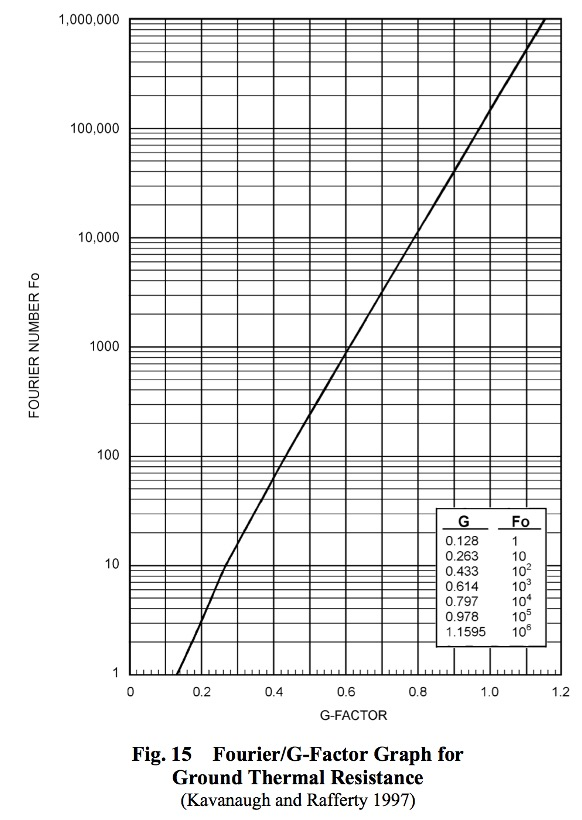

In [ ]:
display(Image(filename='Gfactors.jpg'))

In [107]:
#Ground thermal conductivity 
k_ground = 1.15 # [Btu/hr-ft-°F]

R_ga = (G_f-G_1)/k_ground
print('Effective thermal resistance of the ground, annual pulse',f"{R_ga:.4f}",'[hr-ft-°F/Btu]')
R_gm = (G_1-G_2)/k_ground
print('Effective thermal resistance of the ground, month pulse',f"{R_gm:.4f}",'[hr-ft-°F/Btu]')
R_gd = (G_2)/k_ground
print('Effective thermal resistance of the ground, daily pulse',f"{R_gd:.4f}",'[hr-ft-°F/Btu]')

Effective thermal resistance of the ground, annual pulse 0.1739 [hr-ft-°F/Btu]
Effective thermal resistance of the ground, month pulse 0.2957 [hr-ft-°F/Btu]
Effective thermal resistance of the ground, daily pulse 0.1826 [hr-ft-°F/Btu]


#### Step 7: Determine the length
1) For cooling
$$
L_c = \frac{Q_a R_{ga} + \left(Q_{lc} - 3.41 \, \overline{W}_c \right) \left(R_b + PLF_m R_{gm} + R_{gd} F_{sc} \right)}{t_g - \left(\frac{t_{wi} + t_{wo}}{2} \right) - t_p}
$$
2) For heating
$$L_h = \frac{Q_a R_{ga} + \left(Q_{lh} - 3.41 \, \overline{W}_c \right) \left(R_b + PLF_m R_{gm} + R_{gd} F_{sc} \right)}{t_g - \left(\frac{t_{wi} + t_{wo}}{2} \right) - t_p}$$

In [143]:
# For cooling
numerator_1 = Q_annual * R_ga + (-Q_lc - 3.41*W_cool) * (R_b + PLF_c * R_gm + R_gd * F_sc)
denominator_1 = T_g - ((T_ewt_cool + T_owt_cool) / 2) - T_p
L_c = numerator_1 / denominator_1
print('Ground heat exchanger length for cooling',f"{L_c:.0f}",'[ft]')
numerator_2 = Q_annual * R_ga + (Q_lh - 3.41*W_heat) * (R_b + PLF_h * R_gm + R_gd * F_sc)
denominator_2 = T_g - ((T_ewt_heat + T_owt_heat) / 2) - T_p
L_h = numerator_2 / denominator_2
print('Ground heat exchanger length for heating',f"{L_h:.0f}",'[ft]')


Ground heat exchanger length for cooling 590 [ft]
Ground heat exchanger length for heating 1600 [ft]
